# URBAN WATER QUALITY PREDICTION

**INTERNSHIP TITLE**: May-4th MLDL Team-11

**CATEGORY**: MACHINE LEARNING

**SKILLS REQUIRED**: Python,Python Web Frame Works,Python For Data Analysis,Python For Data Visualization,Exploratory Data Analysis,Data Preprocessing Techniques,Machine Learning,Regression Algorithms,Classification Algorithms.

**PROJECT DESCRIPTION**: With the rapid development of economy and accelerated urbanization, water pollution has become more and more serious. Urban water quality is of great importance to our daily lives. Prediction of urban water quality help control water pollution and protect human health. To overcome this kind of problem statement, we developed a deep learning model to predict the water quality.

**SOLUTION**: Therefore, understanding the problems and trends of water pollution is 
of great significance for the prevention and control of water pollution. 
We have proposed a system that uses Machine learning algorithms to predict 
the water quality in Urban & to forecast the predictions.


# DATA PREPROCESSING

**"IMPORTING THE LIBRARIES"**

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORTING THE DATASET

In [2]:
data = pd.read_csv("dataset.csv",encoding ='ISO-8859-1',low_memory =False)

In [5]:
data

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (Âµmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393.0,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,NaN,0.1,11,27,2014
1,1399.0,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.0,0.2,4953,8391,2014
2,1475.0,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.7,0.1,3243,5330,2014
3,3181.0,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.8,0.5,5382,8443,2014
4,3182.0,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.9,0.4,3428,5500,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330.0,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NaN,NaN,7.9,738.0,7.2,2.7,0.518,0.518,202,2003
1987,1450.0,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NaN,29,7.5,585.0,6.3,2.6,0.155,0.155,315,2003
1988,1403.0,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NaN,28,7.6,98.0,6.2,1.2,NaN,NaN,570,2003
1989,1404.0,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NaN,28,7.7,91.0,6.5,1.3,NaN,NaN,562,2003


In [6]:
data.dtypes

STATION CODE                        float64
LOCATIONS                            object
STATE                                object
Temp                                 object
D.O. (mg/l)                         float64
PH                                  float64
CONDUCTIVITY (Âµmhos/cm)            float64
B.O.D. (mg/l)                       float64
NITRATENAN N+ NITRITENANN (mg/l)     object
FECAL COLIFORM (MPN/100ml)           object
TOTAL COLIFORM (MPN/100ml)Mean       object
year                                  int64
dtype: object

In [7]:
#conversions

data['Temp']=pd.to_numeric(data['Temp'],errors='coerce')
data['NITRATENAN N+ NITRITENANN (mg/l)']=pd.to_numeric(data['NITRATENAN N+ NITRITENANN (mg/l)'],errors='coerce')
data['TOTAL COLIFORM (MPN/100ml)Mean']=pd.to_numeric(data['TOTAL COLIFORM (MPN/100ml)Mean'],errors='coerce')
data.dtypes

STATION CODE                        float64
LOCATIONS                            object
STATE                                object
Temp                                float64
D.O. (mg/l)                         float64
PH                                  float64
CONDUCTIVITY (Âµmhos/cm)            float64
B.O.D. (mg/l)                       float64
NITRATENAN N+ NITRITENANN (mg/l)    float64
FECAL COLIFORM (MPN/100ml)           object
TOTAL COLIFORM (MPN/100ml)Mean      float64
year                                  int64
dtype: object

# TAKING CARE OF MISSING VALUES

In [6]:
#to know if there are any missing values

data.isnull().any()

STATION CODE                         True
LOCATIONS                            True
STATE                                True
Temp                                 True
D.O. (mg/l)                          True
PH                                   True
CONDUCTIVITY (Âµmhos/cm)             True
B.O.D. (mg/l)                        True
NITRATENAN N+ NITRITENANN (mg/l)     True
FECAL COLIFORM (MPN/100ml)           True
TOTAL COLIFORM (MPN/100ml)Mean       True
year                                False
dtype: bool

In [8]:
data['STATION CODE'].fillna(data['STATION CODE'].median(), inplace = True)
data['D.O. (mg/l)'].fillna(data['D.O. (mg/l)'].median(), inplace = True)
data['PH'].fillna(data['PH'].median(),inplace = True)
data['CONDUCTIVITY (Âµmhos/cm)'].fillna(data['CONDUCTIVITY (Âµmhos/cm)'].median(), inplace = True)
data['B.O.D. (mg/l)'].fillna(data['B.O.D. (mg/l)'].median(), inplace = True)
data['NITRATENAN N+ NITRITENANN (mg/l)'].fillna(data['NITRATENAN N+ NITRITENANN (mg/l)'].median(), inplace = True)
data['TOTAL COLIFORM (MPN/100ml)Mean'].fillna(data['TOTAL COLIFORM (MPN/100ml)Mean'].median(), inplace = True)

In [9]:
data

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (Âµmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393.0,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,1.8965,0.100,11,27.0,2014
1,1399.0,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.0000,0.200,4953,8391.0,2014
2,1475.0,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.7000,0.100,3243,5330.0,2014
3,3181.0,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.8000,0.500,5382,8443.0,2014
4,3182.0,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.9000,0.400,3428,5500.0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330.0,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NaN,NaN,7.9,738.0,7.2,2.7000,0.518,0.518,202.0,2003
1987,1450.0,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NaN,29.0,7.5,585.0,6.3,2.6000,0.155,0.155,315.0,2003
1988,1403.0,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NaN,28.0,7.6,98.0,6.2,1.2000,0.516,NaN,570.0,2003
1989,1404.0,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NaN,28.0,7.7,91.0,6.5,1.3000,0.516,NaN,562.0,2003


# data visualization

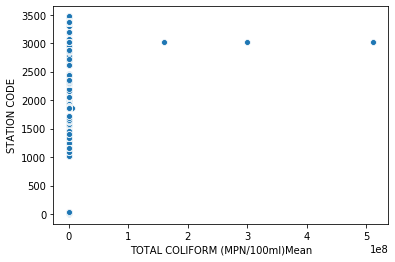

In [9]:
sns.scatterplot(x='TOTAL COLIFORM (MPN/100ml)Mean',y='STATION CODE',data=data)

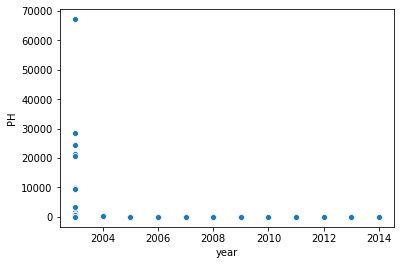

In [10]:
sns.scatterplot(x='year',y='PH',data=data)

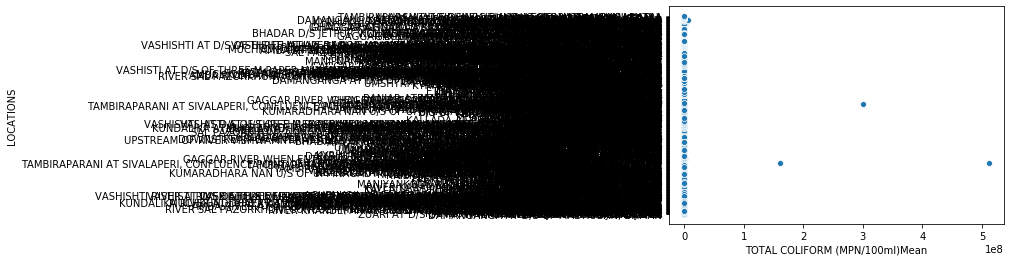

In [11]:
sns.scatterplot(x='TOTAL COLIFORM (MPN/100ml)Mean',y='LOCATIONS',data=data)

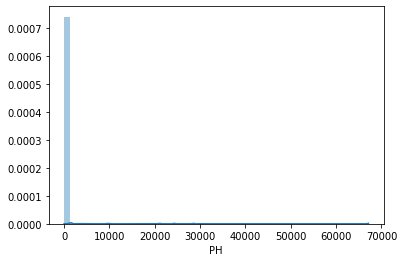

In [12]:
sns.distplot(data['PH'])

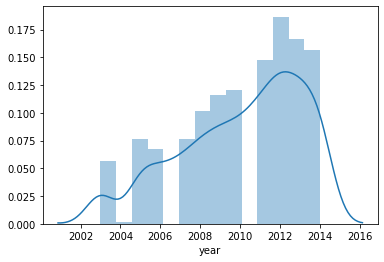

In [13]:
sns.distplot(data['year'])

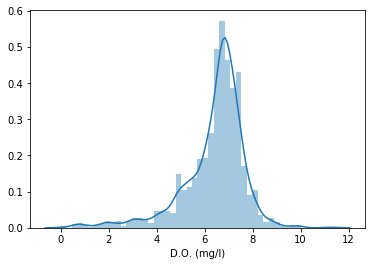

In [14]:
sns.distplot(data['D.O. (mg/l)'])

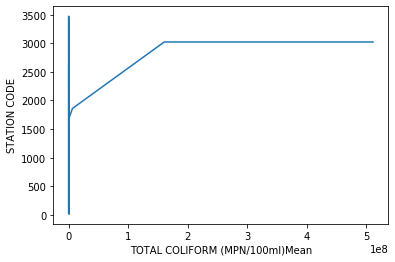

In [15]:
sns.lineplot(x="TOTAL COLIFORM (MPN/100ml)Mean",y="STATION CODE",data=data)

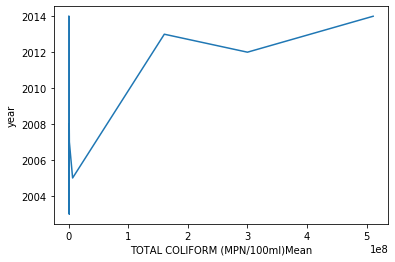

In [16]:
sns.lineplot(x="TOTAL COLIFORM (MPN/100ml)Mean",y="year",data=data)

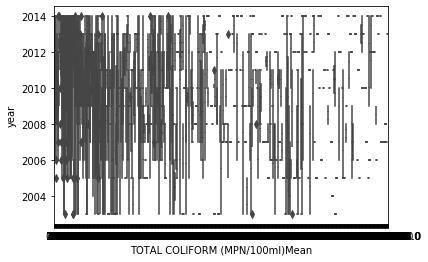

In [17]:
sns.boxplot(x="TOTAL COLIFORM (MPN/100ml)Mean",y="year",data=data)

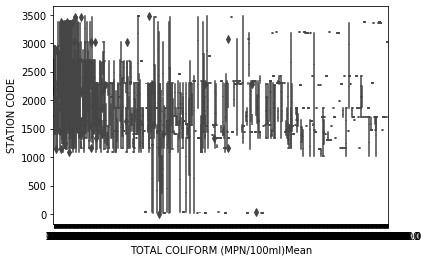

In [18]:
sns.boxplot(x="TOTAL COLIFORM (MPN/100ml)Mean",y="STATION CODE",data=data)

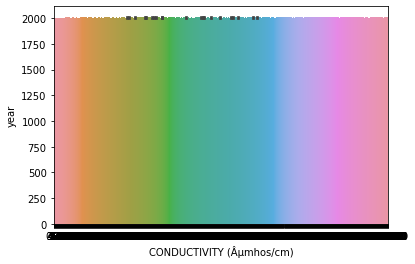

In [19]:
sns.barplot(x="CONDUCTIVITY (Âµmhos/cm)",y="year",data=data)

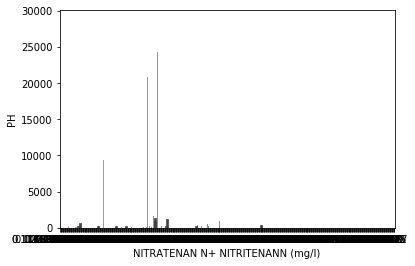

In [20]:
sns.barplot(x="NITRATENAN N+ NITRITENANN (mg/l)",y="PH",data=data)

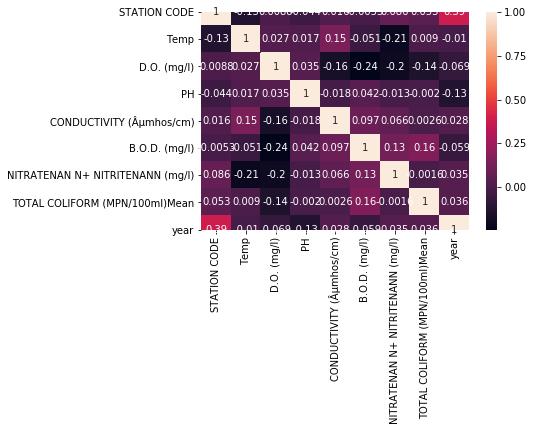

In [21]:
sns.heatmap(data.corr(),annot=True)

In [22]:
mean, cov = [0, 2], [(2, .4), (.4, 2)]
dataset = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(dataset, columns=["TOTAL COLIFORM (MPN/100ml)Mean", "NITRATENAN N+ NITRITENANN (mg/l)"])

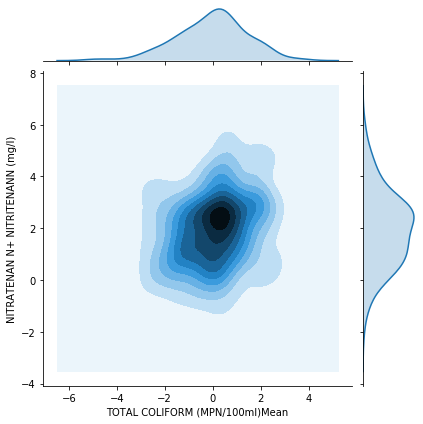

In [23]:
sns.jointplot(x="TOTAL COLIFORM (MPN/100ml)Mean", y="NITRATENAN N+ NITRITENANN (mg/l)", data=df, kind="kde"
);

([<matplotlib.patches.Wedge at 0x24ad5669408>,
 [Text(-0.42015317992371914, 1.2302322160470303, 'CONDUCTIVITY (Âµmhos/cm)'),
  Text(-0.10992152078653307, -1.2953444558371245, 'PH'),
  Text(1.2635497499077637, -0.5548351372326988, 'D.O. (mg/l)')],
 [Text(-0.258555803029981, 0.7570659791058647, '60.48%'),
  Text(-0.06764401279171264, -0.7971350497459228, '26.35%'),
  Text(0.8057418695064, -0.353807913597663, '13.17%')])

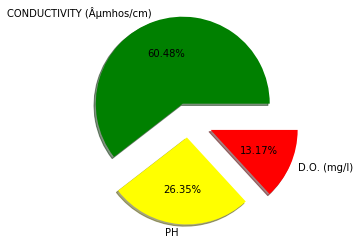

In [24]:
labels=['CONDUCTIVITY (Âµmhos/cm)','PH','D.O. (mg/l)']
size=[9179,4000,1999]
colors = ["green", "yellow", "red"]
explode = (0.2,0.2,0.28)
plt.pie(size,labels=labels,explode=explode,colors=colors,autopct='%1.2f%%',shadow=True)


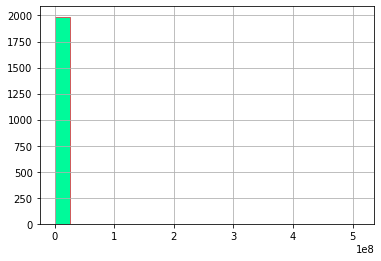

In [25]:

data['TOTAL COLIFORM (MPN/100ml)Mean'].hist(bins=20,color='mediumspringgreen',edgecolor='indianred')
plt.show()

C:\Users\sowmika\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\sowmika\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


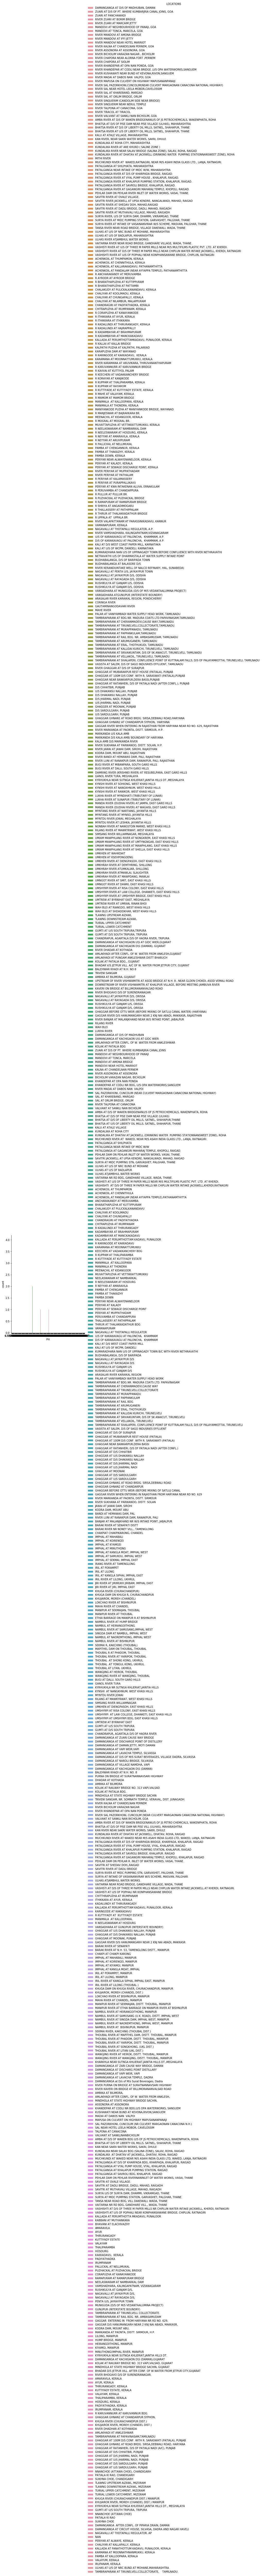

In [26]:
sns.factorplot(x = 'PH',data = data,kind = 'count',hue='LOCATIONS',size=6,aspect=.9)
plt.show()

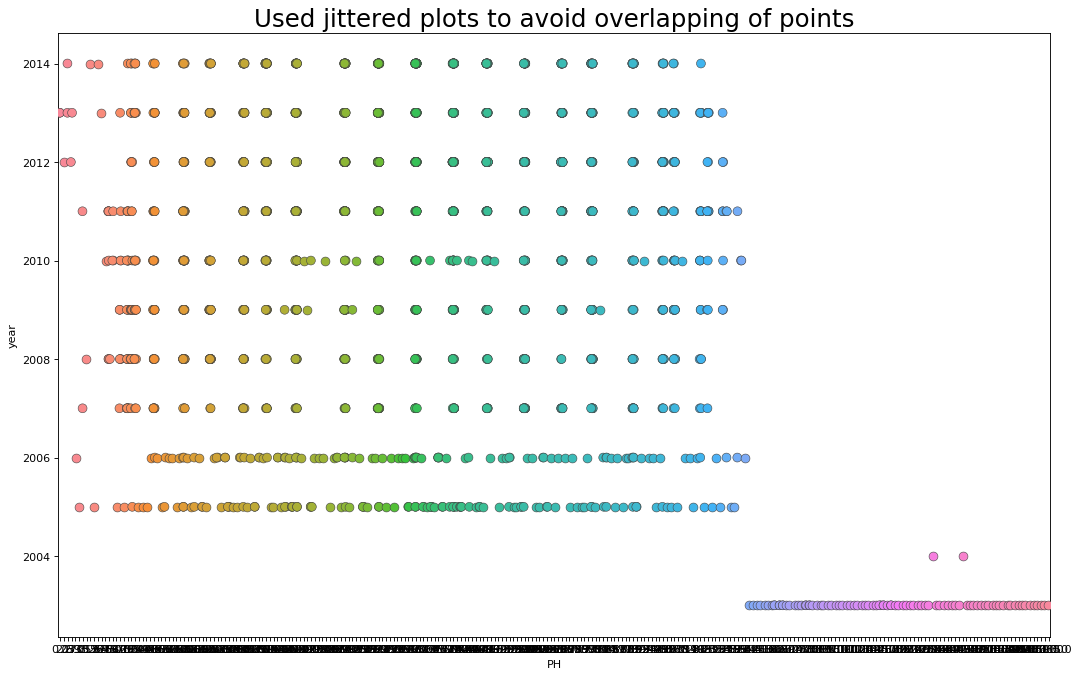

In [27]:
# Import Data
df = pd.read_csv("dataset.csv")

# Draw Stripplot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.stripplot(df.PH, df.year, jitter=0.25, size=8, ax=ax, linewidth=.5)

# Decorations
plt.title('Used jittered plots to avoid overlapping of points', fontsize=22)
plt.show()

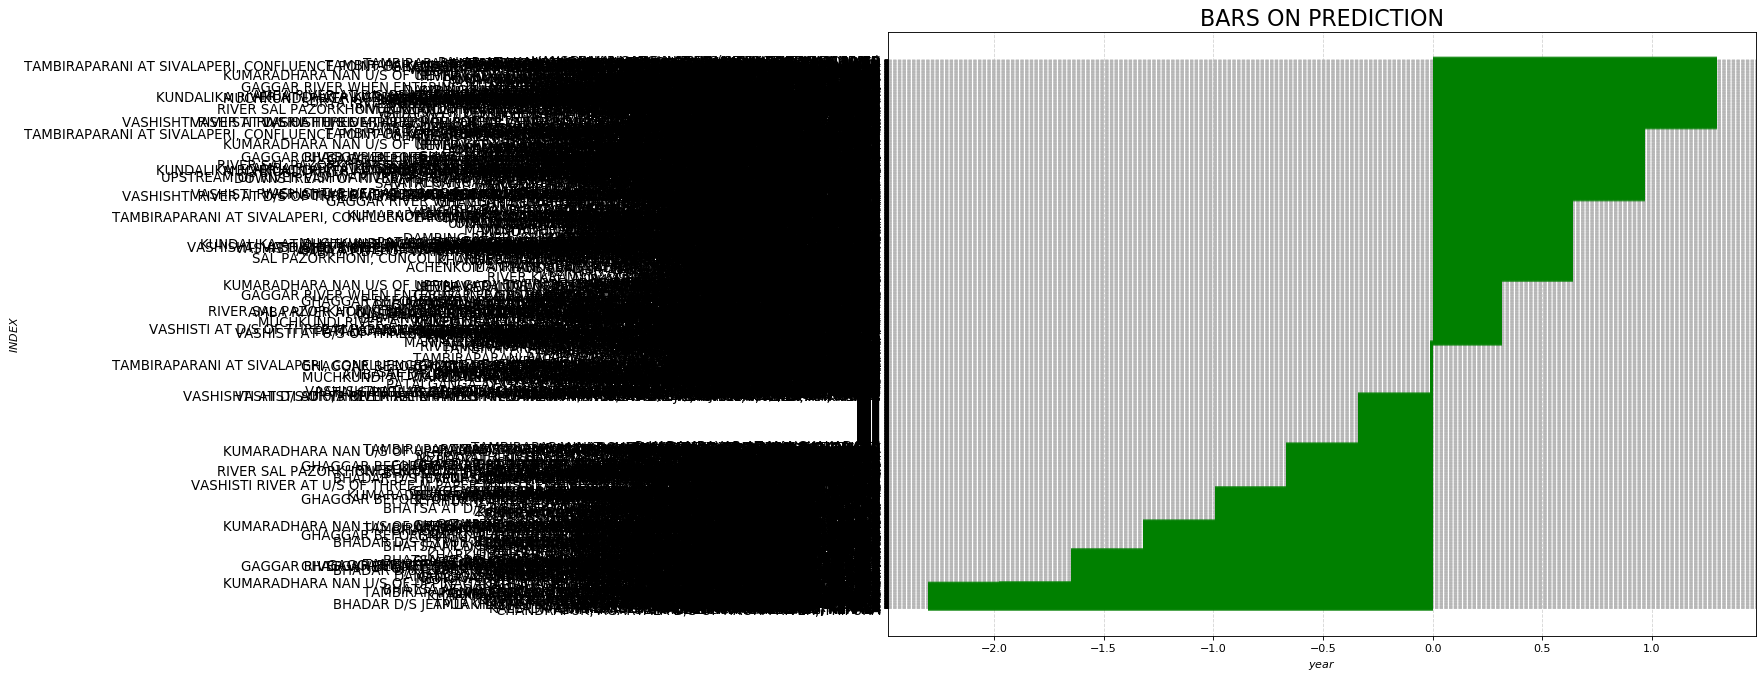

In [28]:
# Prepare Data
df = pd.read_csv("dataset.csv")
x = df.loc[:, ['year']]
df['mpg_z'] = (x - x.mean())/x.std()
df['colors'] = ['red' if x < 0 else 'green' for x in df['year']]
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)

# Draw plot
plt.figure(figsize=(14,10), dpi= 80)
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z, color=df.colors, alpha=0.4, linewidth=5)

# Decorations
plt.gca().set(ylabel='$INDEX$', xlabel='$year$')
plt.yticks(df.index, df.LOCATIONS, fontsize=12)
plt.title('BARS ON PREDICTION', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.show()

_______________________________________________________________________________________________________________________________

In [10]:
#INITIALIZATION

start=0
end=1993
station=data.iloc [start:end ,0]
location=data.iloc [start:end ,1]
state=data.iloc [start:end ,2]
do= data.iloc [start:end ,4].astype(np.float64)
value=0
ph = data.iloc[ start:end,5]  
co = data.iloc [start:end ,6].astype(np.float64)   
  
year=data.iloc[start:end,11]
tc=data.iloc [2:end ,10].astype(np.float64)


bod = data.iloc [start:end ,7].astype(np.float64)
na= data.iloc [start:end ,8].astype(np.float64)
na.dtype

dtype('float64')

In [11]:
data

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (Âµmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393.0,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,1.8965,0.100,11,27.0,2014
1,1399.0,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.0000,0.200,4953,8391.0,2014
2,1475.0,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.7000,0.100,3243,5330.0,2014
3,3181.0,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.8000,0.500,5382,8443.0,2014
4,3182.0,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.9000,0.400,3428,5500.0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330.0,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NaN,NaN,7.9,738.0,7.2,2.7000,0.518,0.518,202.0,2003
1987,1450.0,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NaN,29.0,7.5,585.0,6.3,2.6000,0.155,0.155,315.0,2003
1988,1403.0,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NaN,28.0,7.6,98.0,6.2,1.2000,0.516,NaN,570.0,2003
1989,1404.0,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NaN,28.0,7.7,91.0,6.5,1.3000,0.516,NaN,562.0,2003


In [12]:
data=pd.concat([station,do,ph,co,bod,na,tc],axis=1)
data. columns = ['station','do','ph','co','bod','na','tc']

In [13]:
#calulation of Ph
data['npH']=data.ph.apply(lambda x: (100 if (8.5>=x>=7)  
                                 else(80 if  (8.6>=x>=8.5) or (6.9>=x>=6.8) 
                                      else(60 if (8.8>=x>=8.6) or (6.8>=x>=6.7) 
                                          else(40 if (9>=x>=8.8) or (6.7>=x>=6.5)
                                              else 0)))))

In [14]:
#calculation of dissolved oxygen
data['ndo']=data.do.apply(lambda x:(100 if (x>=6)  
                                 else(80 if  (6>=x>=5.1) 
                                      else(60 if (5>=x>=4.1)
                                          else(40 if (4>=x>=3) 
                                              else 0)))))

In [15]:
#calculation of total coliform
data['nco']=data.tc.apply(lambda x:(100 if (5>=x>=0)  
                                 else(80 if  (50>=x>=5) 
                                      else(60 if (500>=x>=50)
                                          else(40 if (10000>=x>=500) 
                                              else 0)))))

In [16]:
#calc of B.D.O
data['nbdo']=data.bod.apply(lambda x:(100 if (3>=x>=0)  
                                 else(80 if  (6>=x>=3) 
                                      else(60 if (80>=x>=6)
                                          else(40 if (125>=x>=80) 
                                              else 0)))))

In [17]:
#calculation of electrical conductivity
data['nec']=data.co.apply(lambda x:(100 if (75>=x>=0)  
                                 else(80 if  (150>=x>=75) 
                                      else(60 if (225>=x>=150)
                                          else(40 if (300>=x>=225) 
                                              else 0)))))

In [18]:
#Calulation of nitrate
data['nna']=data.na.apply(lambda x:(100 if (20>=x>=0)  
                                 else(80 if  (50>=x>=20) 
                                      else(60 if (100>=x>=50)
                                          else(40 if (200>=x>=100) 
                                              else 0)))))

data.head()
data.dtypes

station    float64
do         float64
ph         float64
co         float64
bod        float64
na         float64
tc         float64
npH          int64
ndo          int64
nco          int64
nbdo         int64
nec          int64
nna          int64
dtype: object

In [19]:
#Calculation of water quality index
data['wph']=data.npH * 0.165
data['wdo']=data.ndo * 0.281
data['wbdo']=data.nbdo * 0.234
data['wec']=data.nec* 0.009
data['wna']=data.nna * 0.028
data['wco']=data.nco * 0.281
data['wqi']=data.wph+data.wdo+data.wbdo+data.wec+data.wna+data.wco 
data

,station,do,ph,co,bod,na,tc,npH,ndo,nco,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
0,1393.0,6.7,7.5,203.0,1.8965,0.100,NaN,100,100,0,100,60,100,16.5,28.10,23.40,0.54,2.8,0.00,71.34
1,1399.0,5.7,7.2,189.0,2.0000,0.200,NaN,100,80,0,100,60,100,16.5,22.48,23.40,0.54,2.8,0.00,65.72
2,1475.0,6.3,6.9,179.0,1.7000,0.100,5330.0,80,100,40,100,60,100,13.2,28.10,23.40,0.54,2.8,11.24,79.28
3,3181.0,5.8,6.9,64.0,3.8000,0.500,8443.0,80,80,40,80,100,100,13.2,22.48,18.72,0.90,2.8,11.24,69.34
4,3182.0,5.8,7.3,83.0,1.9000,0.400,5500.0,100,80,40,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330.0,7.9,738.0,7.2,2.7000,0.518,202.0,0,100,60,100,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06
1987,1450.0,7.5,585.0,6.3,2.6000,0.155,315.0,0,100,60,100,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06
1988,1403.0,7.6,98.0,6.2,1.2000,0.516,570.0,0,100,40,100,100,100,0.0,28.10,23.40,0.90,2.8,11.24,66.44
1989,1404.0,7.7,91.0,6.5,1.3000,0.516,562.0,0,100,40,100,100,100,0.0,28.10,23.40,0.90,2.8,11.24,66.44


In [20]:
data.isnull().any()

station    False
do         False
ph         False
co         False
bod        False
na         False
tc          True
npH        False
ndo        False
nco        False
nbdo       False
nec        False
nna        False
wph        False
wdo        False
wbdo       False
wec        False
wna        False
wco        False
wqi        False
dtype: bool

In [21]:
data['tc'].fillna(data['tc'].median(), inplace = True)

In [22]:
data

,station,do,ph,co,bod,na,tc,npH,ndo,nco,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
0,1393.0,6.7,7.5,203.0,1.8965,0.100,468.0,100,100,0,100,60,100,16.5,28.10,23.40,0.54,2.8,0.00,71.34
1,1399.0,5.7,7.2,189.0,2.0000,0.200,468.0,100,80,0,100,60,100,16.5,22.48,23.40,0.54,2.8,0.00,65.72
2,1475.0,6.3,6.9,179.0,1.7000,0.100,5330.0,80,100,40,100,60,100,13.2,28.10,23.40,0.54,2.8,11.24,79.28
3,3181.0,5.8,6.9,64.0,3.8000,0.500,8443.0,80,80,40,80,100,100,13.2,22.48,18.72,0.90,2.8,11.24,69.34
4,3182.0,5.8,7.3,83.0,1.9000,0.400,5500.0,100,80,40,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330.0,7.9,738.0,7.2,2.7000,0.518,202.0,0,100,60,100,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06
1987,1450.0,7.5,585.0,6.3,2.6000,0.155,315.0,0,100,60,100,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06
1988,1403.0,7.6,98.0,6.2,1.2000,0.516,570.0,0,100,40,100,100,100,0.0,28.10,23.40,0.90,2.8,11.24,66.44
1989,1404.0,7.7,91.0,6.5,1.3000,0.516,562.0,0,100,40,100,100,100,0.0,28.10,23.40,0.90,2.8,11.24,66.44


In [23]:
data.isnull().any()

station    False
do         False
ph         False
co         False
bod        False
na         False
tc         False
npH        False
ndo        False
nco        False
nbdo       False
nec        False
nna        False
wph        False
wdo        False
wbdo       False
wec        False
wna        False
wco        False
wqi        False
dtype: bool

In [24]:
#dropping of columns

data=data.drop(columns=["npH","ndo","nbdo","nec","nna","wph","wdo","wbdo","wec","wna","wco","nco"],axis=1)
data

,station,do,ph,co,bod,na,tc,wqi
0,1393.0,6.7,7.5,203.0,1.8965,0.100,468.0,71.34
1,1399.0,5.7,7.2,189.0,2.0000,0.200,468.0,65.72
2,1475.0,6.3,6.9,179.0,1.7000,0.100,5330.0,79.28
3,3181.0,5.8,6.9,64.0,3.8000,0.500,8443.0,69.34
4,3182.0,5.8,7.3,83.0,1.9000,0.400,5500.0,77.14
...,...,...,...,...,...,...,...,...
1986,1330.0,7.9,738.0,7.2,2.7000,0.518,202.0,72.06
1987,1450.0,7.5,585.0,6.3,2.6000,0.155,315.0,72.06
1988,1403.0,7.6,98.0,6.2,1.2000,0.516,570.0,66.44
1989,1404.0,7.7,91.0,6.5,1.3000,0.516,562.0,66.44


In [25]:
data.head(10)

,station,do,ph,co,bod,na,tc,wqi
0,1393.0,6.7,7.5,203.0,1.8965,0.1,468.0,71.34
1,1399.0,5.7,7.2,189.0,2.0000,0.2,468.0,65.72
2,1475.0,6.3,6.9,179.0,1.7000,0.1,5330.0,79.28
3,3181.0,5.8,6.9,64.0,3.8000,0.5,8443.0,69.34
4,3182.0,5.8,7.3,83.0,1.9000,0.4,5500.0,77.14
5,1400.0,5.5,7.4,81.0,1.5000,0.1,4049.0,77.14
6,1476.0,6.1,6.7,308.0,1.4000,0.3,5672.0,75.44
7,3185.0,6.4,6.7,414.0,1.0000,0.2,9423.0,75.44
8,3186.0,6.4,7.6,305.0,2.2000,0.1,4990.0,82.04
9,3187.0,6.3,7.6,77.0,2.3000,0.1,4301.0,82.76


In [26]:
x=data.iloc[:,0:7].values #x contains inputs
y=data.iloc[:,7].values #y contains output

In [27]:
x

array([[1.3930e+03, 6.7000e+00, 7.5000e+00, ..., 1.8965e+00, 1.0000e-01,
        4.6800e+02],
       [1.3990e+03, 5.7000e+00, 7.2000e+00, ..., 2.0000e+00, 2.0000e-01,
        4.6800e+02],
       [1.4750e+03, 6.3000e+00, 6.9000e+00, ..., 1.7000e+00, 1.0000e-01,
        5.3300e+03],
       ...,
       [1.4030e+03, 7.6000e+00, 9.8000e+01, ..., 1.2000e+00, 5.1600e-01,
        5.7000e+02],
       [1.4040e+03, 7.7000e+00, 9.1000e+01, ..., 1.3000e+00, 5.1600e-01,
        5.6200e+02],
       [1.7260e+03, 7.6000e+00, 1.1000e+02, ..., 1.1000e+00, 5.1600e-01,
        5.4600e+02]])

In [28]:
y

array([71.34, 65.72, 79.28, ..., 66.44, 66.44, 66.44])

In [29]:
x.shape

(1991, 7)

In [30]:
y.shape

(1991,)

# SPLITTING OF DATA INTO TEST AND TRAIN

In [32]:
#splitting the dataset into test and train

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 , random_state=0)

In [33]:
x_test.shape

(399, 7)

In [34]:
y_test.shape

(399,)

In [35]:
x_train.shape

(1592, 7)

In [36]:
y_train.shape

(1592,)

# MODEL BUILDING USING RANDOM FOREST REGRESSOR

**"TRAINING"**

In [37]:
from sklearn.ensemble import RandomForestRegressor
rdr=RandomForestRegressor(n_estimators=10,random_state=0)
rdr.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [38]:
yr=rdr.predict(x_test)

In [39]:
yr

array([82.94 , 87.66 , 55.82 , 73.04 , 76.168, 50.994, 66.44 , 88.362,
       82.04 , 76.106, 79.64 , 52.622, 87.66 , 73.04 , 77.414, 72.512,
       78.3  , 58.756, 88.362, 70.836, 87.66 , 83.214, 82.04 , 66.192,
       81.95 , 94.18 , 82.04 , 67.646, 82.94 , 87.66 , 83.52 , 88.38 ,
       82.76 , 89.238, 50.2  , 88.38 , 83.7  , 36.324, 87.66 , 88.38 ,
       82.04 , 93.28 , 82.4  , 79.226, 94.18 , 55.82 , 82.706, 72.006,
       74.896, 72.06 , 82.94 , 72.914, 82.04 , 83.7  , 33.376, 83.96 ,
       84.36 , 94.18 , 78.858, 61.44 , 77.988, 67.932, 64.156, 94.18 ,
       82.6  , 83.7  , 85.152, 66.44 , 83.52 , 70.058, 88.38 , 79.424,
       78.776, 76.146, 83.394, 82.476, 61.44 , 82.314, 71.16 , 70.266,
       77.988, 77.32 , 77.868, 82.94 , 66.386, 88.2  , 99.026, 88.924,
       88.56 , 82.94 , 93.694, 99.746, 76.42 , 69.274, 87.66 , 69.944,
       87.66 , 76.42 , 32.706, 79.64 , 76.162, 86.514, 82.94 , 71.332,
       51.262, 81.614, 78.516, 82.94 , 88.38 , 78.3  , 50.2  , 82.98 ,
      

In [40]:
from sklearn.metrics import r2_score

In [41]:
accu=r2_score(y_test,yr)
accu

0.9721948019899869

In [43]:
import pickle #saving 
pickle.dump(rdr,open('rdr1.pkl','wb'))